In [ ]:
import numpy as np
import pandas as pd
from nltk.stem.porter import *
stemmer = PorterStemmer()
import re
import random
random.seed(2018)

from google.colab import drive
drive.mount('/content/drive')

pathtrain = '/content/drive/My Drive/Colab Notebooks/data/train.csv'
path_pro_desc = '/content/drive/My Drive/Colab Notebooks/data/product_descriptions.csv'
path_attr = '/content/drive/My Drive/Colab Notebooks/data/attributes.csv'
df_train = pd.read_csv(pathtrain, encoding="ISO-8859-1")
df_pro_desc = pd.read_csv(path_pro_desc)
df_attr = pd.read_csv(path_attr)

Mounted at /content/drive


In [ ]:
df_brand = df_attr[df_attr.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})
df_all = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')
df_all = pd.merge(df_all, df_brand, how='left', on='product_uid')

In [ ]:
def str_stem(s): 
    if isinstance(s, str):
        s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
        s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
        s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
        s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
        s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
        s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
        s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
        s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
        s = re.sub(r"([0-9]+)( *)(°|degrees|degree)\.?", r"\1 deg. ", s)
        s = re.sub(r"([0-9]+)( *)(v|volts|volt)\.?", r"\1 volt. ", s)
        s = re.sub(r"([0-9]+)( *)(wattage|watts|watt)\.?", r"\1 watt. ", s)
        s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1 amp. ", s)
        s = re.sub(r"([0-9]+)( *)(qquart|quart)\.?", r"\1 qt. ", s)
        s = re.sub(r"([0-9]+)( *)(hours|hour|hrs.)\.?", r"\1 hr ", s)
        s = re.sub(r"([0-9]+)( *)(gallons per minute|gallon per minute|gal per minute|gallons/min.|gallons/min)\.?", r"\1 gal. per min. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons per hour|gallon per hour|gal per hour|gallons/hour|gallons/hr)\.?", r"\1 gal. per hr ", s)
        s = s.replace("$"," ")
        s = s.replace("?"," ")
        s = s.replace("&nbsp;"," ")
        s = s.replace("&amp;","&")
        s = s.replace("&#39;","'")
        s = s.replace("/>/Agt/>","")
        s = s.replace("</a<gt/","")
        s = s.replace("gt/>","")
        s = s.replace("/>","")
        s = s.replace("<br","")
        s = s.replace("<.+?>","")
        s = s.replace("[ &<>)(_,;:!?\+^~@#\$]+"," ")
        s = s.replace("'s\\b","")
        s = s.replace("[']+","")
        s = s.replace("[\"]+","")
        s = s.replace("-"," ")
        s = s.replace("+"," ")
        s = s.replace("[ ]?[[(].+?[])]","")
        s = s.replace("size: .+$","")
        s = s.replace("size [0-9]+[.]?[0-9]+\\b","")
        
        
        return " ".join([stemmer.stem(re.sub('[^A-Za-z0-9-./]', ' ', word)) for word in s.lower().split()])
    else:
        return "null"

In [ ]:
df_all['product_title'] = df_all['product_title'].apply(str_stem)
df_all['search_term'] = df_all['search_term'].apply(str_stem)
df_all['product_description'] = df_all['product_description'].apply(str_stem)
df_all['brand'] = df_all['brand'].apply(str_stem)

In [ ]:
a = 0 
for i in range(a,a+2):
    print(df_all.product_title[i])
    print(df_all.search_term[i])
    print(df_all.product_description[i])
    print(df_all.brand[i])
    print(df_all.relevance[i])
    print()

simpson strong tie 12 gaug angl
angl bracket
not onli do angl make joint stronger  they also provid more consistent  straight corners. simpson strong tie offer a wide varieti of angl in variou size and thick to handl light duti job or project where a structur connect is needed. some can be bent  skewed  to match the project. for outdoor project or those where moistur is present  use our zmax zinc coat connectors  which provid extra resist against corros  look for a  z  at the end of the model number .versatil connector for variou 90 connect and home repair projectsstrong than angl nail or screw fasten alonehelp ensur joint are consist straight and strongdimensions  3in. x 3in. x 1 1/2in. made from 12 gaug steelgalvan for extra corros resistanceinstal with 10d common nail or  9 x 1 1/2in. strong drive sd screw
simpson strong tie
3.0

simpson strong tie 12 gaug angl
l bracket
not onli do angl make joint stronger  they also provid more consistent  straight corners. simpson strong tie offe

In [ ]:
def str_common_word(str1, str2):
    str1, str2 = str1.lower(), str2.lower()
    words, count = str1.split(), 0
    for word in words:
        if str2.find(word)>=0:
            count+=1
    return count
    
def str_whole_word(str1, str2, i_):
    str1, str2 = str1.lower().strip(), str2.lower().strip()
    count = 0
    while i_ < len(str2):
        i_ = str2.find(str1, i_)
        if i_ == -1:
            return count
        else:
            count += 1
            i_ += len(str1)
    return count

In [ ]:
df_all['word_len_of_search_term'] = df_all['search_term'].apply(lambda x:len(x.split())).astype(np.int64)
df_all['word_len_of_title'] = df_all['product_title'].apply(lambda x:len(x.split())).astype(np.int64)
df_all['word_len_of_description'] = df_all['product_description'].apply(lambda x:len(x.split())).astype(np.int64)
df_all['word_len_of_brand'] = df_all['brand'].apply(lambda x:len(x.split())).astype(np.int64)
df_all['product_info'] = df_all['search_term']+"\t"+df_all['product_title'] +"\t"+df_all['product_description']
df_all['query_in_title'] = df_all['product_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[1],0))
df_all['query_in_description'] = df_all['product_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[2],0))
df_all['word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))
df_all['query_title_len_prop']=df_all['word_len_of_title']/df_all['word_len_of_search_term']
df_all['query_desc_len_prop']=df_all['word_len_of_description']/df_all['word_len_of_search_term']
df_all['ratio_title'] = df_all['word_in_title']/df_all['word_len_of_search_term']
df_all['ratio_description'] = df_all['word_in_description']/df_all['word_len_of_search_term']
df_all['attr'] = df_all['search_term']+"\t"+df_all['brand']+"\t"+df_all['product_title']
df_all['word_in_brand'] = df_all['attr'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['ratio_brand'] = df_all['word_in_brand']/df_all['word_len_of_brand']


In [ ]:
df_all.drop(['id', 'product_uid', 'product_title', 'search_term', 'product_description', 'brand', 'product_info', 'attr'], axis=1, inplace=True)

In [ ]:
df_all.columns

Index(['relevance', 'word_len_of_search_term', 'word_len_of_title',
       'word_len_of_description', 'word_len_of_brand', 'query_in_title',
       'query_in_description', 'word_in_title', 'word_in_description',
       'query_title_len_prop', 'query_desc_len_prop', 'ratio_title',
       'ratio_description', 'word_in_brand', 'ratio_brand'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = df_all.loc[:, df_all.columns != 'relevance']
y = df_all.loc[:, df_all.columns == 'relevance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_pred, y_test)
rf_rmse = np.sqrt(rf_mse)
print('RandomForest RMSE: %.4f' % rf_rmse)

RandomForest RMSE: 0.4790


In [ ]:
from sklearn.linear_model import Ridge

rg= Ridge(alpha=.1)
rg.fit(X_train, y_train.values.ravel())
y_pred = rg.predict(X_test)
rg_mse = mean_squared_error(y_pred, y_test)
rg_rmse = np.sqrt(rg_mse)
print('Ridge RMSE: %.4f' % rg_rmse)

Ridge RMSE: 0.4852


In [ ]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train.values.ravel())
y_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_pred, y_test)
xgb_rmse = np.sqrt(xgb_mse)
print('Xgboost RMSE: %.4f' % xgb_rmse)

Xgboost RMSE: 0.4773


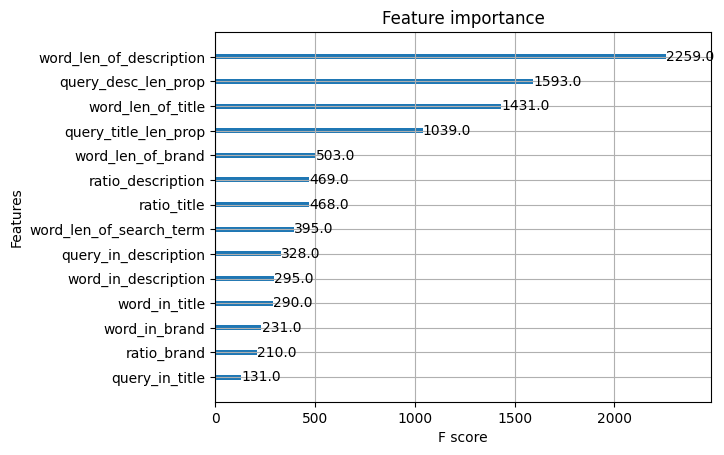

In [ ]:
from xgboost import plot_importance
plot_importance(xgb);